This file is used to generate the configuration files for Bernoulli simulation.  
The configuration file should include a header. Each of the remaining lines should contain 11 parameters:  
- alpha_p, beta_p: the hyperparameter of the Beta prior of the success probability.
- d: dimension of data.
- k0, k1: the number of class-specific topics and the number of shared topics.
- nlabel: the number of class.
- ntrace, nchain, nskip: the parameter for sampling.
- N: the size of the dataset.
- Nfold: the number of folds in CV.

## test case

In [ ]:
# This file is used for test code correctness
header = "alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold"
para = [] 
ntrace = 100
nchain = 1
nskip = 2
Ntrain = 50
Ntest = 10
Nfold = 5

k0, k1 = 2, 5
d = 20
alpha_p = beta_p = 0.5
for nlabel in [2,4]:
    para.append([alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold]) 

with open("configurations_test.csv", "w") as f:
    f.write(header)
    f.write("\n")
    for i in range(len(para)):
        tem = [str(char) for char in para[i]]
        f.write(",".join(tem))
        f.write("\n")

# with open("configurations_test.csv", "r") as f:
#     x = f.readlines()
# x

: 

## Fix number of topics
- Fix k0 = 2, k1 = 5.
- Try d = 20, 40, 60, 80, 100.
- Increase nlabel from 2 to the max number that ensures K<=d. Stepsize = 2
- Try alpha_p, beta_p = (1, 1), (2, 5), (0.5, 0.5).
- The number of replicas = 2.


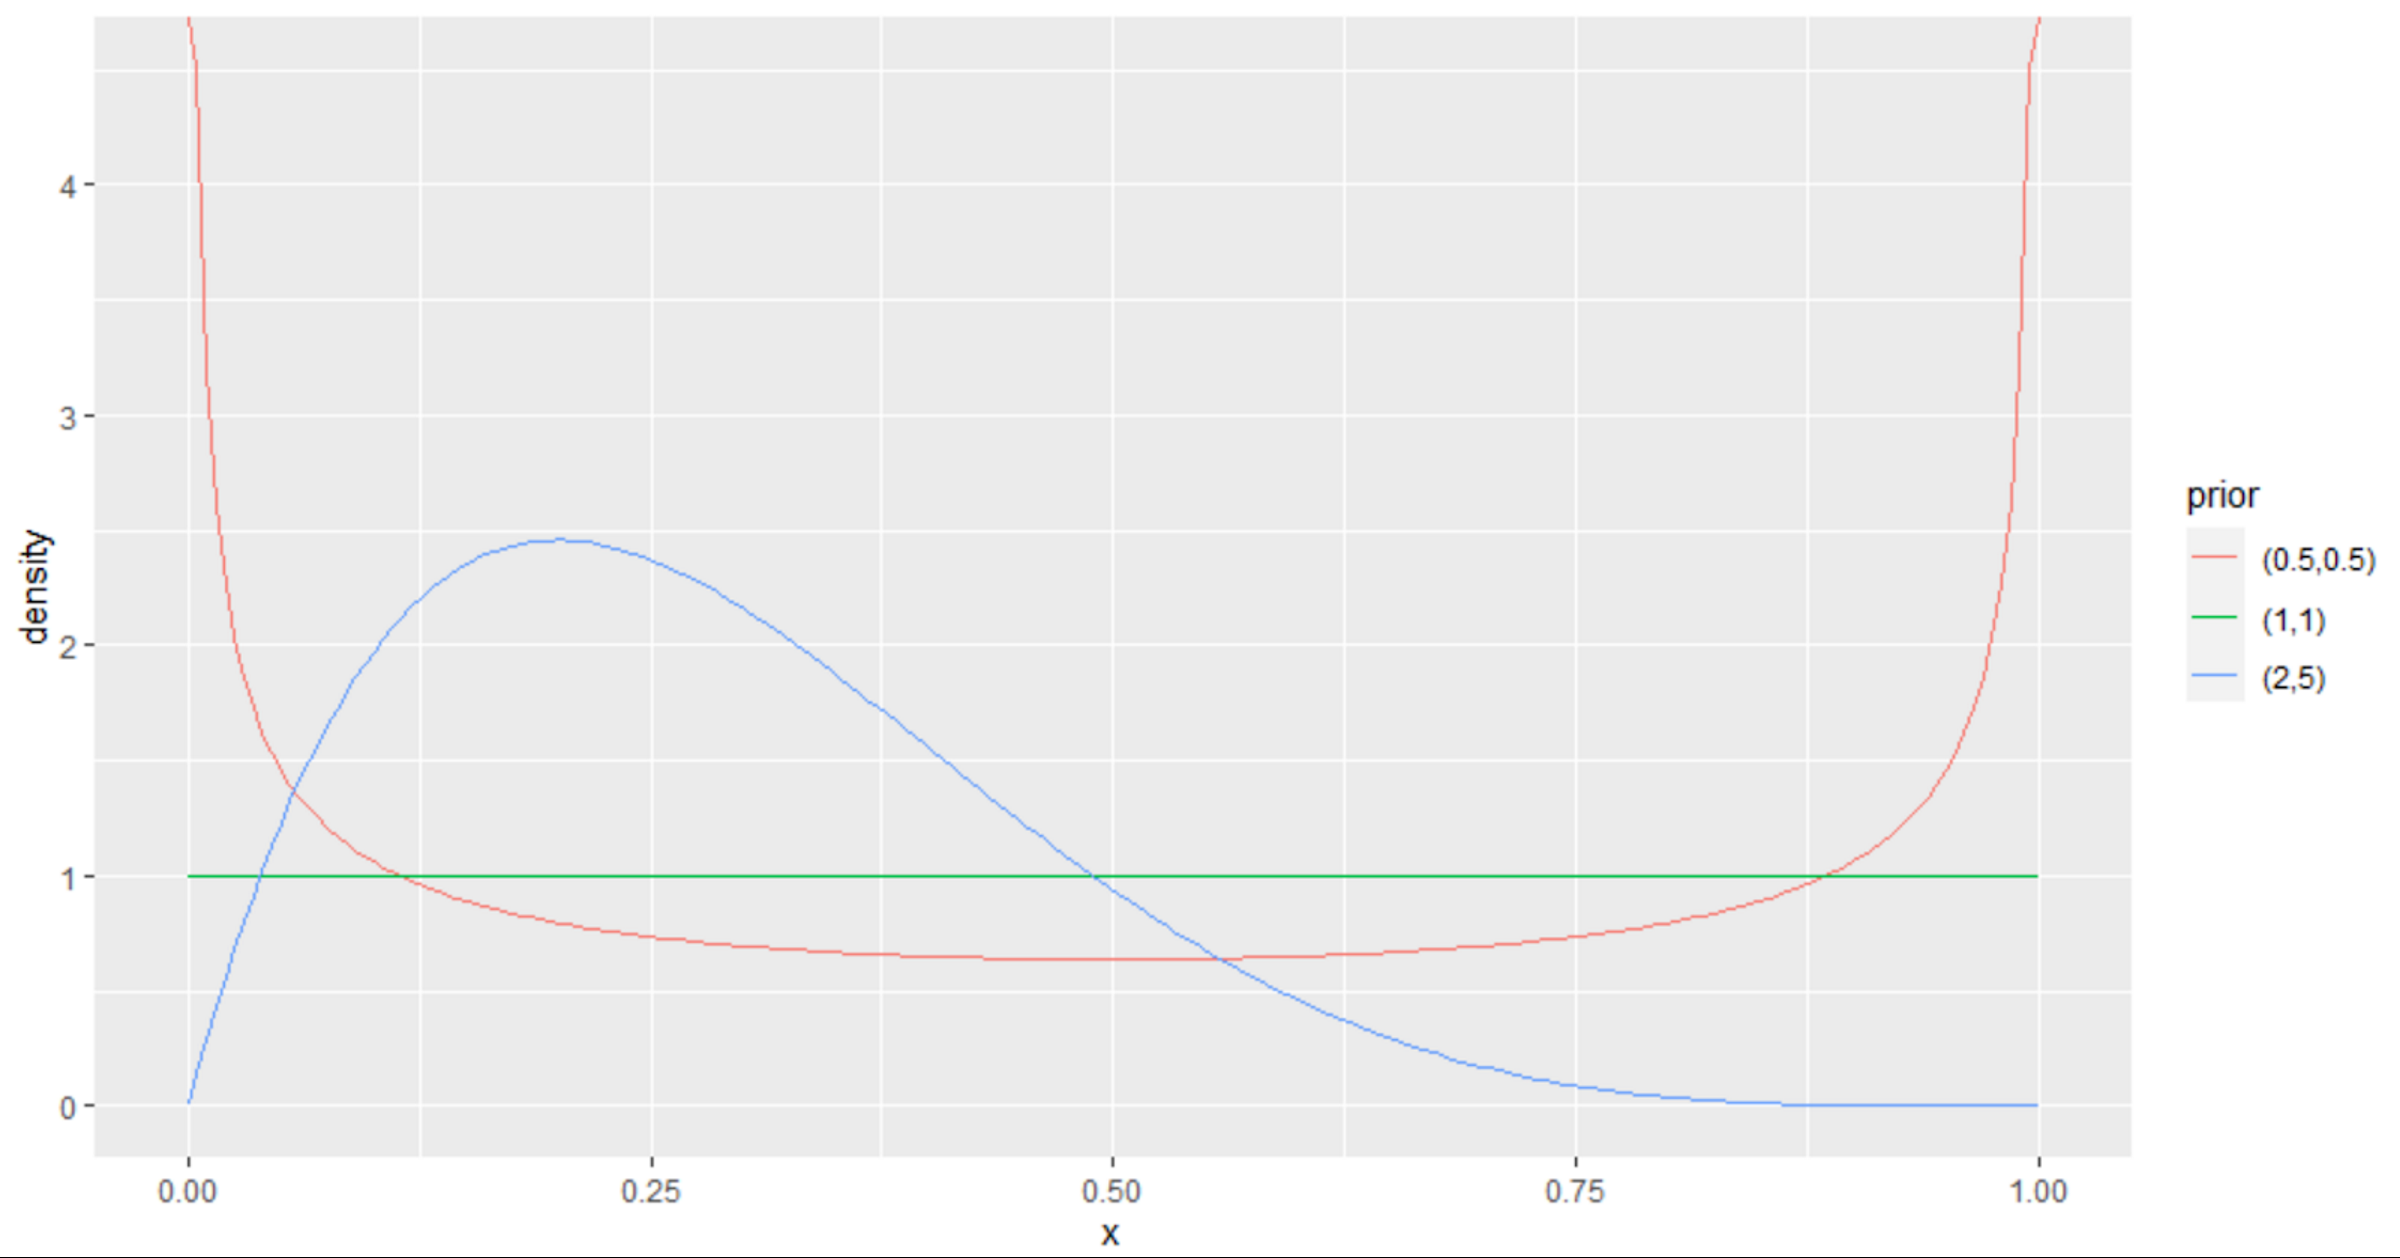

In [2]:
header = "alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold"

para = [] 
# fixed parameters
ntrace = 1000
nchain = 2
nskip = 2
Ntrain = 500
Ntest = 100
Nfold = 5
k0, k1 = 2, 5

for alpha_p, beta_p in [(1, 1), (2, 5), (0.5, 0.5)]: # prior
    for d in [20, 40, 60, 80, 100]: # dimension
        max_nlabel = (d - k1)//k0
        for nlabel in range(2, max_nlabel+1, 2):
            para.append([alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold]) 
            para.append([alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold]) 
            
with open("configurations_fix_ntopic.csv", "w") as f:
    f.write(header)
    f.write("\n")
    for i in range(len(para)):
        tem = [str(char) for char in para[i]]
        f.write(",".join(tem))
        f.write("\n")            


## Fix dimension
- Fix d = 100.
- Fix alpha_p = (1, 1).
- Try k0, k1 = 2, 5, 10

In [3]:
header = "alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold"

para = [] 

# fixed parameters
ntrace = 1000
nchain = 2
nskip = 2
Ntrain = 500
Ntest = 100
Nfold = 5

d = 100
alpha_p, beta_p = (1, 1)
# for alpha_p, beta_p in [(1, 1), (2, 5), (0.5, 0.5)]: # prior
#     for d in [20, 40, 60, 80, 100]: # dimension
for k0 in [2, 5, 10]:
    for k1 in [2, 5, 10]:
        if (k0, k1) == (2, 5): continue
        max_nlabel = (d - k1)//k0
        for nlabel in range(2, max_nlabel+1, 2):
            para.append([alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold]) 
            para.append([alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold]) 
            
with open("configurations_d100.csv", "w") as f:
    f.write(header)
    f.write("\n")
    for i in range(len(para)):
        tem = [str(char) for char in para[i]]
        f.write(",".join(tem))
        f.write("\n")            

## random configurations

In [4]:
# random parameter
import numpy as np
import random

header = "alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold"

para = [] 

# fixed parameters
ntrace = 500
nchain = 2
nskip = 2
Ntrain = 200
Ntest = 100
Nfold = 5

for i in range(600):
    d = np.random.randint(low = 20, high = 200, size=1)[0]
    nlabel = np.random.randint(low = 2, high = 11, size=1)[0]
    
    max_k0 = (d-1)//nlabel
    k0 = np.random.randint(low = 1, high = max_k0+1, size=1)[0]
    k1 = np.random.randint(low = 1, high = d-k0*nlabel+1, size=1)[0]

    alpha_p = np.random.uniform(0,10,1)[0]
    beta_p = np.random.uniform(0,10,1)[0]
    
    para.append([alpha_p, beta_p, d, k0, k1, nlabel, ntrace, nchain, nskip, Ntrain, Ntest, Nfold]) 

with open("configurations_random.csv", "w") as f:
    f.write(header)
    f.write("\n")
    for i in range(len(para)):
        tem = [str(char) for char in para[i]]
        f.write(",".join(tem))
        f.write("\n")            